# Milestone 2
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Introduction

Name  : Izzatur Arrasya 002<br>

## Dataset Introduction
<b>Movie Posters</b> <br>

"Can machine learning algorithms classify genres of movies by looking at the poster?"

A movie can belong to more than one genre. It doesn’t just have to belong to one category, like action or comedy. The movie can be a combination of two or more genres. Hence, multi-label image classification. This dataset contains the poster images of several multi-genre movies.

## Objective

In this notebook of Milestone 1 was created to evaluate concept as follows:

1. Able to understand the concept of Computer Vision/NLP
2. Able to prepare data for use in Computer Vision/NLP
3. Able to implement Computer Vision/NLP
4. Able to evaluated the models
5. Able to tuning the models

## Import library
---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import vgg19
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from tqdm import tqdm

## Data Loading
---

In [ ]:
#load data using pandas

df = pd.read_csv('/content/drive/MyDrive/Hacktiv8/Milestone 2/archive/Multi_Label_dataset/train.csv')
df = df.head(7200)
df.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           7200 non-null   object
 1   Genre        7200 non-null   object
 2   Action       7200 non-null   int64 
 3   Adventure    7200 non-null   int64 
 4   Animation    7200 non-null   int64 
 5   Biography    7200 non-null   int64 
 6   Comedy       7200 non-null   int64 
 7   Crime        7200 non-null   int64 
 8   Documentary  7200 non-null   int64 
 9   Drama        7200 non-null   int64 
 10  Family       7200 non-null   int64 
 11  Fantasy      7200 non-null   int64 
 12  History      7200 non-null   int64 
 13  Horror       7200 non-null   int64 
 14  Music        7200 non-null   int64 
 15  Musical      7200 non-null   int64 
 16  Mystery      7200 non-null   int64 
 17  N/A          7200 non-null   int64 
 18  News         7200 non-null   int64 
 19  Reality-TV   7200 non-null 

In [ ]:
df.shape

(7200, 27)

In [ ]:
df.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

## Data Cleaning
---

In [ ]:
#copy dataframe
df_mp = df.copy()

In [ ]:
#check any missing value
df_mp.isnull().sum()

Id             0
Genre          0
Action         0
Adventure      0
Animation      0
Biography      0
Comedy         0
Crime          0
Documentary    0
Drama          0
Family         0
Fantasy        0
History        0
Horror         0
Music          0
Musical        0
Mystery        0
N/A            0
News           0
Reality-TV     0
Romance        0
Sci-Fi         0
Short          0
Sport          0
Thriller       0
War            0
Western        0
dtype: int64

## Data Preprocessing
---

In [ ]:
IMG_WIDTH = 224
IMG_HEIGHT = 224
X = []
for i in tqdm(range(df.shape[0])):
  path = '/content/drive/MyDrive/Hacktiv8/Milestone 2/archive/Multi_Label_dataset/Images/'+df_mp['Id'][i]+'.jpg'
  img = image.load_img(path,target_size=(IMG_WIDTH, IMG_HEIGHT, 3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)

100%|██████████| 7200/7200 [29:10<00:00,  4.11it/s]


In [ ]:
X.shape

(7200, 224, 224, 3)

In [ ]:
y = df.drop(['Id','Genre'],axis=1)
y = y.to_numpy()
y.shape

(7200, 25)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

## Modeling
---

In [ ]:
#Define input size of image
IMG_SIZE = (IMG_HEIGHT, IMG_WIDTH)

In [ ]:
#Set random seed
tf.keras.backend.clear_session
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
#Base pre-trained model
base_model = vgg19.VGG19(include_top=False, weights="imagenet" , input_shape=(IMG_WIDTH, IMG_HEIGHT,3))
base_model.trainable=False
base_model.summary()

80150528/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [ ]:
model = Sequential()
model.add(Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))


model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(25,activation='sigmoid'))

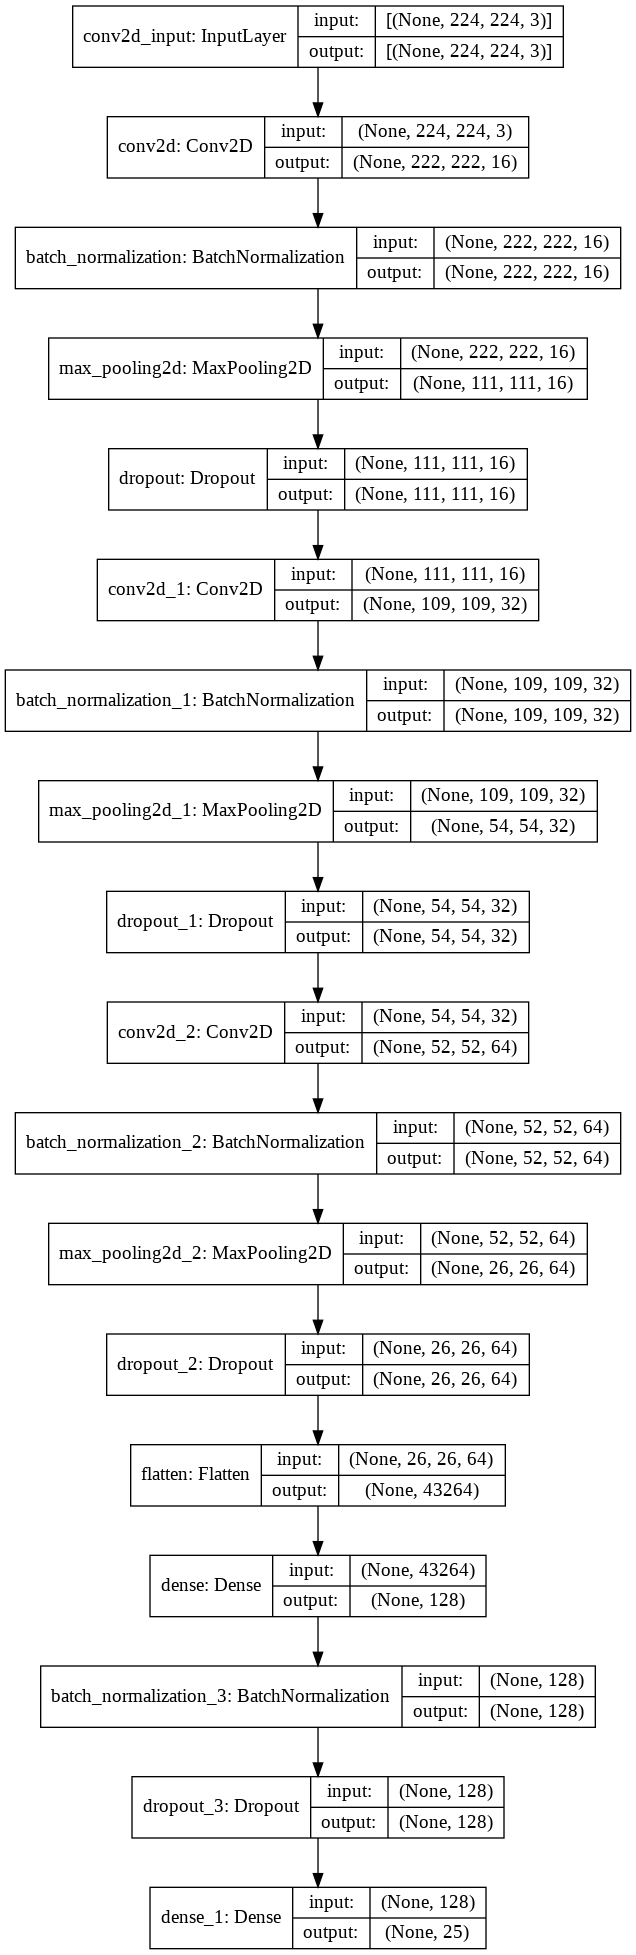

In [ ]:
#show the result of architecture
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 222, 222, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 109, 109, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss= "binary_crossentropy" , metrics=["accuracy", "AUC","Recall","Precision"])

In [ ]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
203/203 [==============================] - 387s 2s/step - loss: 0.2099 - accuracy: 0.3776 - auc: 0.8832 - recall: 0.2986 - precision: 0.6496 - val_loss: 0.2319 - val_accuracy: 0.2833 - val_auc: 0.8526 - val_recall: 0.2791 - val_precision: 0.5593
Epoch 2/10
203/203 [==============================] - 387s 2s/step - loss: 0.2028 - accuracy: 0.3921 - auc: 0.8929 - recall: 0.3349 - precision: 0.6578 - val_loss: 0.2368 - val_accuracy: 0.2736 - val_auc: 0.8416 - val_recall: 0.2008 - val_precision: 0.6043
Epoch 3/10
203/203 [==============================] - 386s 2s/step - loss: 0.1953 - accuracy: 0.4052 - auc: 0.9030 - recall: 0.3656 - precision: 0.6726 - val_loss: 0.2392 - val_accuracy: 0.3125 - val_auc: 0.8415 - val_recall: 0.2361 - val_precision: 0.5835
Epoch 4/10
203/203 [==============================] - 385s 2s/step - loss: 0.1870 - accuracy: 0.4128 - auc: 0.9126 - recall: 0.4021 - precision: 0.6796 - val_loss: 0.2442 - val_accuracy: 0.2847 - val_auc: 0.8348 - val_recall: 0.2

## Model Evaluation & Inference
---

In [ ]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='best')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='best')
  plt.show()

In [ ]:
plotLearningCurve(history,5)

Comedy
Romance
Drama


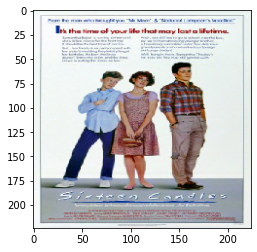

In [ ]:
img = image.load_img('/content/drive/MyDrive/Hacktiv8/Milestone 2/archive/Multi_Label_dataset/Images/tt0088128.jpg',target_size=(IMG_WIDTH, IMG_HEIGHT,3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1,IMG_WIDTH, IMG_HEIGHT,3)
classes = df_mp.columns[2:]
y_pred = model.predict(img)
top3=np.argsort(y_pred[0])[:-4:-1]
for i in range(3):
  print(classes[top3[i]])

Drama
Action
Romance


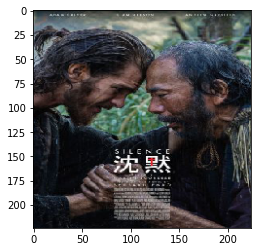

In [ ]:
img = image.load_img('/content/drive/MyDrive/Hacktiv8/Milestone 2/archive/Multi_Label_dataset/Silence.jpg',target_size=(IMG_WIDTH, IMG_HEIGHT,3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1,IMG_WIDTH, IMG_HEIGHT,3)
classes = df_mp.columns[2:]
y_pred = model.predict(img)
top3=np.argsort(y_pred[0])[:-4:-1]
for i in range(3):
  print(classes[top3[i]])

### Model Inference

Drama
Comedy
Action


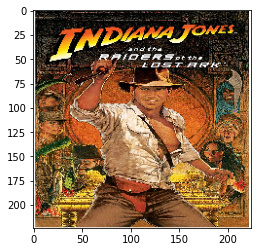

In [ ]:
img = image.load_img('/content/drive/MyDrive/Hacktiv8/Milestone 2/archive/Multi_Label_dataset/Raiders of the lost ark.jpg',target_size=(IMG_WIDTH, IMG_HEIGHT,3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1,IMG_WIDTH, IMG_HEIGHT,3)
classes = df_mp.columns[2:]
y_pred = model.predict(img)
top3=np.argsort(y_pred[0])[:-4:-1]
for i in range(3):
  print(classes[top3[i]])

Drama
Action
Adventure


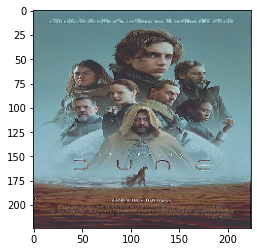

In [ ]:
img = image.load_img('/content/drive/MyDrive/Hacktiv8/Milestone 2/archive/Multi_Label_dataset/Dune.jpg',target_size=(IMG_WIDTH, IMG_HEIGHT,3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1,IMG_WIDTH, IMG_HEIGHT,3)
classes = df_mp.columns[2:]
y_pred = model.predict(img)
top3=np.argsort(y_pred[0])[:-4:-1]
for i in range(3):
  print(classes[top3[i]])

## Conclusion
---

From above, we could see these following things :

1. Dataset that we used is a movie poster with 7,867 data training but we use only 25% 2600 data
2. We can conclude that our model need some Dropout, BatchNormalization, and ImageAugmentation for improving the model
Model that just we improved is better, It can predict most of our class but for a few class it can't predict 
3. From model inference the first data "Free Guy" got correct prediction genre but the second data "Midnight Mass" miss genre so on further research can improved the model